In [91]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sns



In [110]:
from sklearn.datasets import make_blobs
points=make_blobs(n_samples=1000,n_features=2,cluster_std=4,centers=4)
points=points[0]

In [94]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

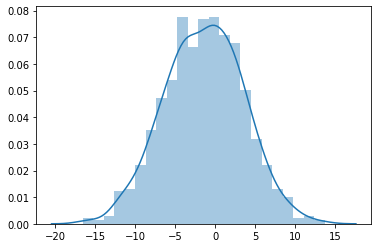

In [112]:
sns.distplot(points[:,0])

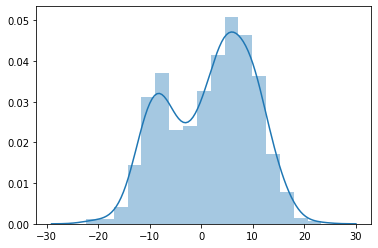

In [106]:
sns.distplot(points[:,1])

<IPython.core.display.Javascript object>

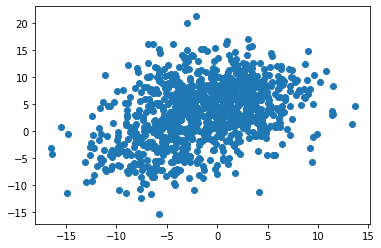

In [114]:
plt.scatter(points[:,0],points[:,1])

In [115]:
len(points)

1000

# INITIALIZE CENTROIDS

In [116]:
def initialize_centroids(points,k):
    centroids=points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
    
centroids=initialize_centroids(points,3)
centroids

array([[-8.98165157, -7.46485524],
       [-4.73437698, -0.1002449 ],
       [ 0.75599821,  9.52737908]])

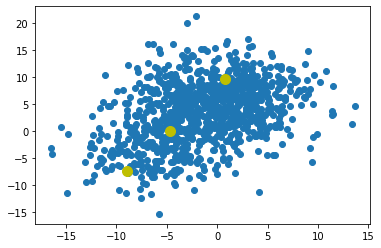

In [117]:
pl.scatter(points[:,0],points[:,1])
pl.scatter(centroids[:,0],centroids[:,1],c='y',s=100)

In [118]:
def closest_centroids(points,centroids):
    datas=[]
    for i in range(len(points)):
        temp_list=[]
        for j in range(len(centroids)):
            temp=np.sqrt((centroids[j][0]-points[i][0])**2+(centroids[j][1]-points[i][1])**2)
            temp_list.append(temp)
        datas.append(np.argmin(temp_list))
    return datas
centroids=np.array(initialize_centroids(points,3))
closest=np.array(closest_centroids(points,centroids))

print(closest)

[2 0 0 0 2 0 1 1 1 1 2 1 2 2 0 2 0 2 1 1 1 2 0 1 1 0 1 0 0 2 2 0 1 0 0 0 1
 0 1 0 2 2 2 0 0 0 2 1 0 2 2 0 0 0 1 2 2 0 1 2 2 0 1 2 0 0 1 0 0 2 0 1 0 1
 0 1 2 2 1 1 0 2 2 2 2 0 1 1 1 0 0 1 0 1 2 0 2 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 0 2 2 1 0 0 1 1 2 1 1 2 2 0 1 2 1 2 1 0 2 0 2 0 0 0 2
 1 2 0 2 2 2 0 0 0 1 0 0 2 0 0 0 1 0 2 0 1 1 1 2 0 0 0 0 0 0 0 1 1 2 0 1 0
 2 0 0 0 0 0 0 1 0 2 0 1 0 1 2 1 0 0 0 1 0 2 0 1 0 1 0 0 1 0 0 2 1 2 1 2 2
 0 1 0 2 1 2 2 2 1 2 1 0 2 2 0 2 2 0 0 0 1 2 0 0 2 0 0 0 0 0 2 1 0 0 0 1 2
 2 0 0 0 0 1 2 2 2 0 2 1 2 2 0 1 2 2 2 1 2 1 0 2 2 1 1 2 1 0 0 0 2 0 0 2 0
 2 2 2 1 0 0 0 0 0 2 2 0 0 1 0 1 0 2 2 0 2 1 1 0 2 2 0 1 2 2 1 0 1 2 0 2 2
 0 1 2 0 2 0 0 0 2 1 2 1 0 1 0 2 2 1 0 0 1 2 2 0 2 0 1 2 2 0 1 1 1 0 0 2 2
 0 0 0 0 0 2 0 0 0 0 2 0 1 0 2 0 2 1 0 1 0 0 1 0 0 0 0 1 2 2 2 1 1 1 1 2 2
 1 0 2 0 1 0 2 0 2 0 0 1 2 2 0 1 1 0 2 0 2 1 1 1 0 1 2 1 2 2 0 0 1 2 2 0 2
 1 2 2 0 0 0 0 2 1 2 1 0 1 1 1 0 1 2 0 2 0 0 2 0 1 0 2 0 0 2 0 0 0 0 0 0 2
 0 0 1 0 0 0 2 2 0 2 2 2 

In [119]:
def move_centroids(points,closest,centroids):
    means=[]
    for i in range(len(centroids)):
        indexes=(points[closest==i]).mean(axis=0)
        means.append(indexes)
    return np.array(means)
moved=move_centroids(points,closest,centroids)
moved

array([[-5.52056975, -0.15994252],
       [ 2.36616354, 10.05320862],
       [ 1.70485131,  3.251221  ]])

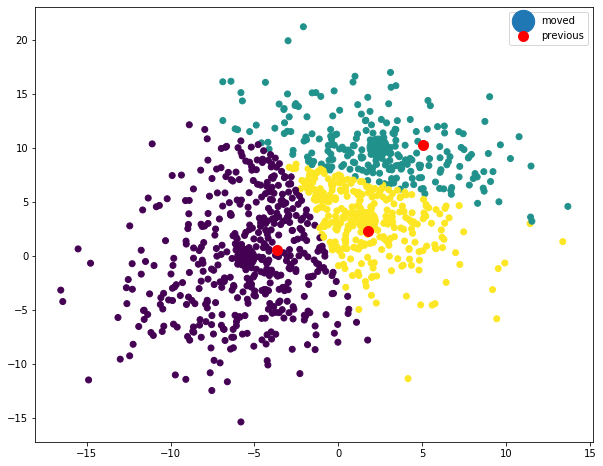

In [120]:
colors=closest.copy()
colors=(closest+10)*9.9
pl.figure(figsize=(10,8))
pl.scatter(points[:,0],points[:,1],c=colors)
pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='moved')
pl.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label='previous')
pl.legend()

In [121]:
from JSAnimation import IPython_display
from matplotlib import animation

In [122]:
# fig = pl.figure()
# ax = pl.axes(xlim=(-4, 4), ylim=(-4, 4))
# centroids = initialize_centroids(points, 3)

# def init():
#     return 

# def animate():
#     global centroids
#     closest = closest_centroids(points, centroids)
#     centroids = move_centroids(points, closest, centroids)
#     ax.cla()
#     ax.scatter(points[:, 0], points[:, 1], c=closest)
#     ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
#     return 

# animation.FuncAnimation(fig, animate, init_func=init,
#                         frames=10, interval=200, blit=True)

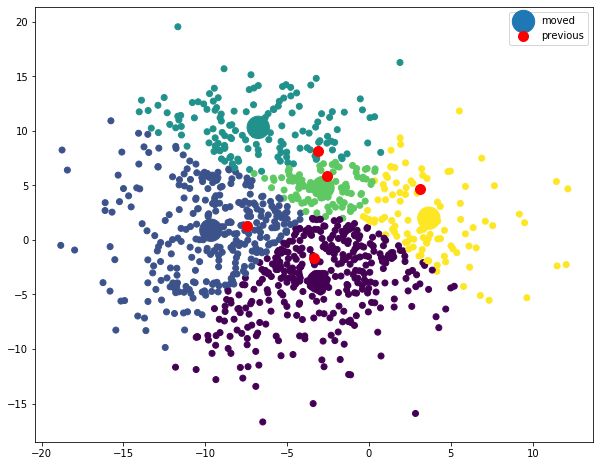

[[ -3.78726498  -4.6745553 ]
 [-10.00332265   0.18224955]
 [ -7.88392994  10.21007899]
 [ -2.88374328   4.25842171]
 [  3.45668543   0.66500956]]


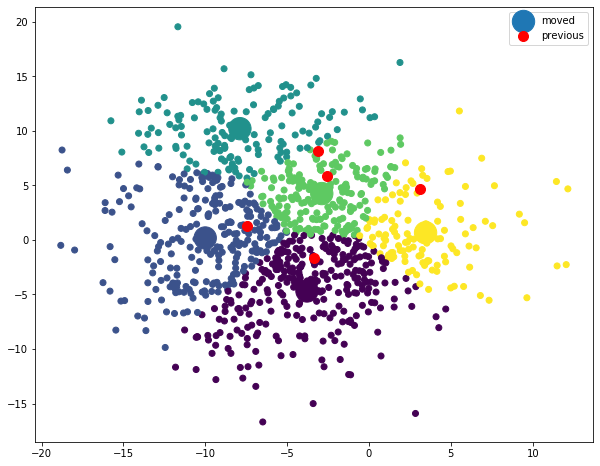

[[ -4.30568842  -5.1211191 ]
 [-10.18021402  -0.3583649 ]
 [ -8.47823274   9.72381361]
 [ -2.92089057   4.15212066]
 [  3.04766857   0.03729505]]


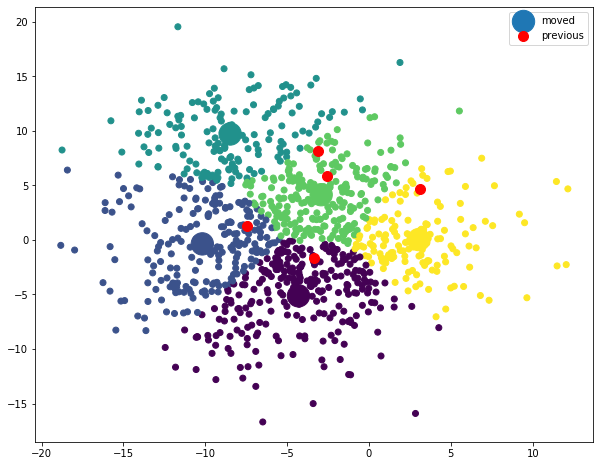

[[ -4.53875994  -5.29691302]
 [-10.19841567  -0.73065526]
 [ -8.72967068   9.4586576 ]
 [ -3.00028215   4.14515904]
 [  2.76713345  -0.26657124]]


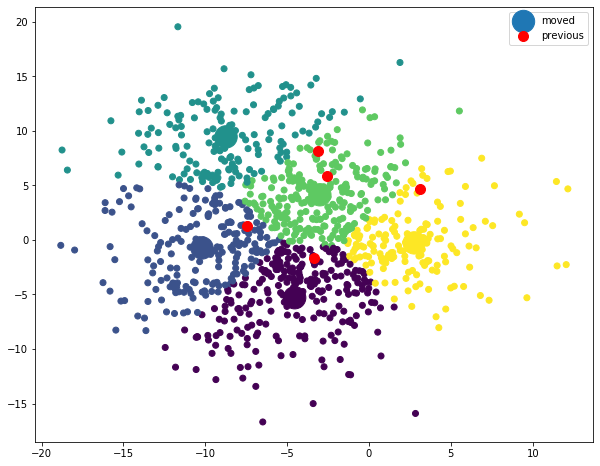

[[ -4.71538874  -5.51914149]
 [-10.14736453  -0.8895474 ]
 [ -8.80724861   9.3224743 ]
 [ -2.97185895   4.15232091]
 [  2.46538743  -0.48505598]]


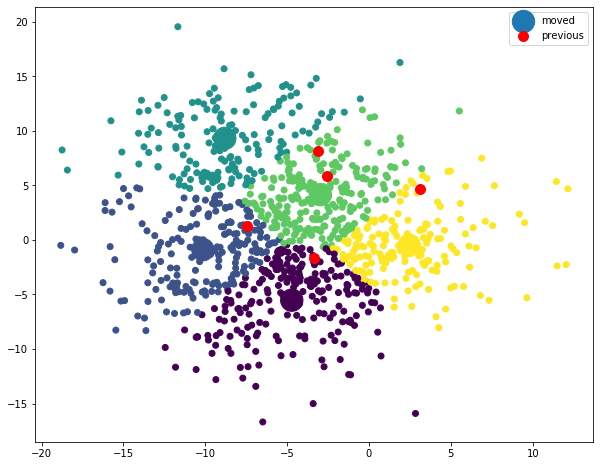

[[ -4.85813313  -5.67654624]
 [-10.12720377  -0.89376694]
 [ -8.80724861   9.3224743 ]
 [ -2.93535755   4.12170006]
 [  2.31060084  -0.66429088]]


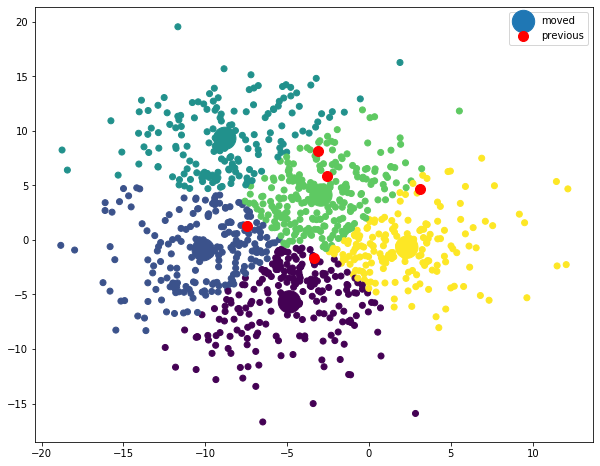

[[ -5.00511504  -5.85460776]
 [-10.03124409  -0.86631586]
 [ -8.79817501   9.29766667]
 [ -2.85391187   4.14847236]
 [  2.15005612  -0.8633025 ]]


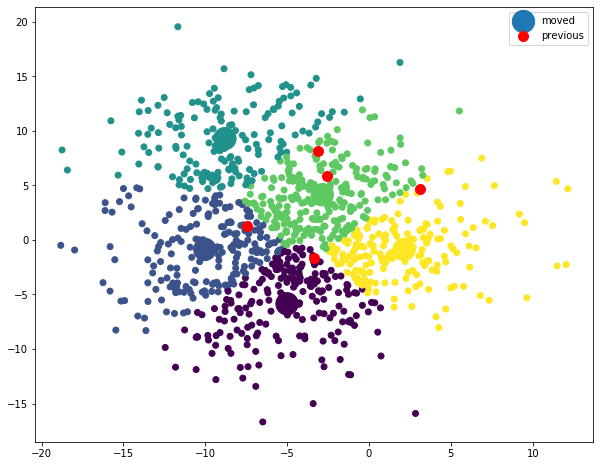

[[-5.11376893 -5.90395737]
 [-9.98882587 -0.84287851]
 [-8.77815894  9.28544538]
 [-2.80867548  4.15837929]
 [ 2.08505178 -0.9739345 ]]


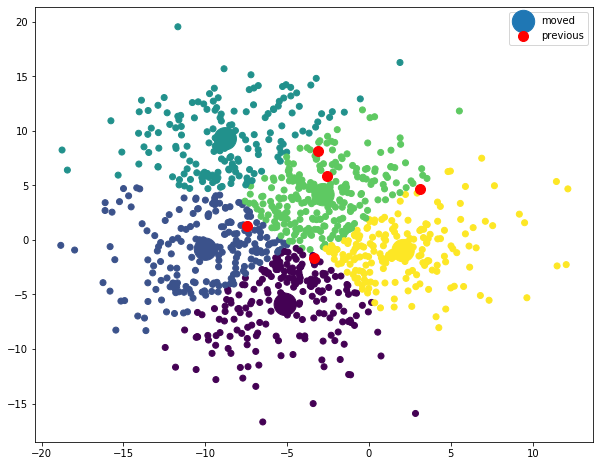

[[-5.13926642 -5.95357152]
 [-9.94168357 -0.84574333]
 [-8.75609981  9.27563039]
 [-2.7882563   4.17570338]
 [ 2.03319891 -1.01348951]]


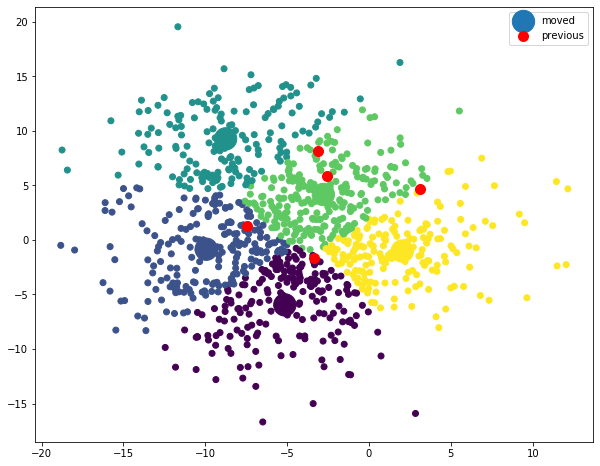

[[-5.13994776 -6.00256149]
 [-9.89946146 -0.87769021]
 [-8.78784346  9.24936146]
 [-2.79495177  4.15577954]
 [ 2.03319891 -1.01348951]]


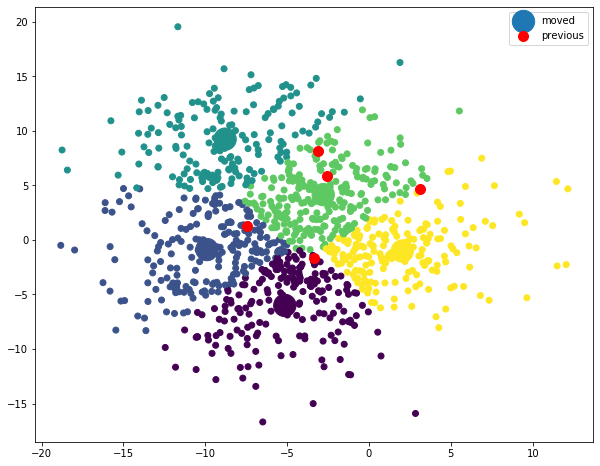

In [178]:
points=make_blobs(n_samples=1000,n_features=2,cluster_std=4,centers=4)
points=points[0]
centroids=np.array(initialize_centroids(points,5))


moved=None
for i in range(10):
    if moved is None:
        closest=np.array(closest_centroids(points,centroids))
        moved=move_centroids(points,closest,centroids)
        
        colors=closest.copy()
        colors=(closest+10)*9.9
        pl.figure(figsize=(10,8))
        pl.scatter(points[:,0],points[:,1],c=colors)
        pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='moved')
        pl.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label='previous')
        pl.legend()
        pl.show()
        
    else:
        closest=np.array(closest_centroids(points,moved))
        moved=move_centroids(points,closest,moved)
        print(moved)
        colors=closest.copy()
        colors=(closest+10)*9.9
        pl.figure(figsize=(10,8))
        pl.scatter(points[:,0],points[:,1],c=colors)
        pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='moved')
        pl.scatter(centroids[:,0],centroids[:,1],s=100,c='red',label='previous')
        pl.legend()
        pl.show()


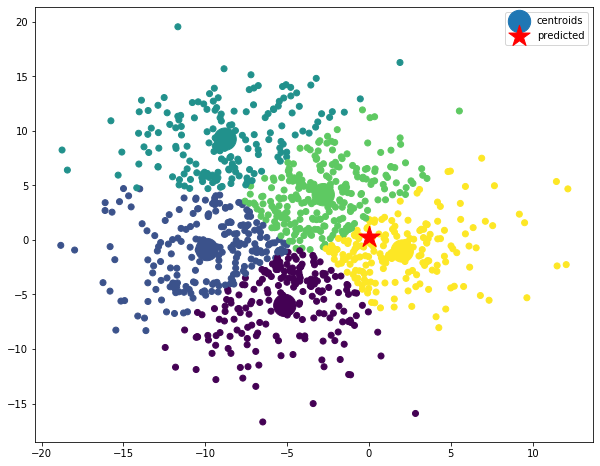

In [195]:
def predict(predict_point,moved):
    a=np.argmin([np.sqrt((predict_point[0]-moved[i][0])**2+(predict_point[1]-moved[i][1])**2) for i in range(len(moved))])
    colors=closest.copy()
    colors=(closest+10)*9.9
    predicted_color=(a+10)*9.9
    pl.figure(figsize=(10,8))
    pl.scatter(points[:,0],points[:,1],c=colors)
    pl.scatter(moved[:,0],moved[:,1],s=500,c=np.unique(colors),label='centroids')
    pl.scatter(predict_point[0],predict_point[1],s=500,marker='*',c='r',label='predicted')
    pl.legend()
    pl.show()
predict_point=np.random.randn(2)
predict(predict_point,moved)

array([[ 1.46360424,  1.42813457],
       [-6.46163166,  0.54960974],
       [ 4.21616355,  8.47141553],
       [-6.13501651, -6.16237089],
       [-2.93638375,  8.38698868]])